![Astrofisica Computacional](../logo.PNG)

---
## 01. A Perceptron


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will implement a perceptron algorithm, which incorporates the idea of a linear regression and a activation function to define a classification method.

---

## The Perceptron Algorithm

Introduced by F. Rosenblatt in 1957, a perceptron algorithm tries to model the behavior of a single (artificial) neuron. This algorithm will be modelled as a function that recieves input data, the it wights them and adds a term to present the result through a non-linear function. It will correspond to an algorithm of supervised learning (binary classification).

The general behavior and components can be seen in the following figure:


<center>
<img
src="https://datascientest.com/wp-content/uploads/2021/03/perceptron-formule.png"
>
</center>



Now we will build a perceptron from scratch. The first step is to define the function that reads the input data, weigths and bias and returns the result of the linear model.

As a first model, we will consider a perceptron with one input: $x_1$, one weight: $w_1$ and one bias: $b$ and gives one return: z = $w_1 x_1 + b$.

In [1]:
import numpy as np
import pandas as pd


This perceptron is just a linear function with a slope $w_1$ and an intercept $b$ defined in the construction. 

---

## A Learning Perceptron

The main characteristic we want to give to the perceptron is that it can 'learn' by itself, i.e. based on a dataset with inputs and targets, the perceptron must be able to redefine its weigths and bias. In order to illustrate this idea, we introduce a dataset of temperatures in Celsius and the targets will be the corresponding temperatures in the Fahrenheit scale,

In [2]:
X = np.array([-40., -30., -10., -5., 0., 8., 15., 22., 38., 50.]) # Input data
y = np.array([-40. , -22. ,  14. ,  23. ,  32. ,  46.4,  59. ,  71.6, 100.4,
       122. ]) #Targets


df = pd.DataFrame(X, columns=['ºC'])
df['ºF'] = y

df

,ºC,ºF
0,-40.0,-40.0
1,-30.0,-22.0
2,-10.0,14.0
3,-5.0,23.0
4,0.0,32.0
5,8.0,46.4
6,15.0,59.0
7,22.0,71.6
8,38.0,100.4
9,50.0,122.0


We define a new perceptron class with random generated weigths and bias and we will apply it to a dataset to compare the results with the known targets,

We will modify the percepton class to include a parameter with the information about how many 'epochs', i.e. repetitions, will be performed.

In [7]:
class perceptron:
    def __init__(self):
        pass
        
    def predict(self, x, w, b):
        return np.dot(w, x) + b
    
    def evaluate(self, x, y, w, b):
        yp = self.predict(x, w, b)
        return sum((yp - y)**2)

    
p = perceptron()

In [61]:
n = 100
gen1 = np.zeros([n,3])
gen1[:,0:2] = np.random.rand(n,2)*100

In [62]:
for i in range(n):
    gen1[i,2] = p.evaluate(X, y, gen1[i,0], gen1[i,1])


In [63]:
sorted_index_array = np.argsort(gen1[:,2])
sorted_index_array

array([42, 30, 47, 63, 50, 51, 60, 20,  8, 76, 84, 78, 89, 53, 52, 85, 57,
       18, 36, 91, 93,  3, 54, 31, 86, 92, 11,  7, 17, 58, 21, 38, 83, 69,
       61, 79, 90, 10, 71, 40, 39, 74, 49, 41, 13, 28, 88, 23, 16, 44,  5,
       97, 64, 45,  0,  2, 62, 48, 25, 67, 35, 77, 12,  4, 29, 80, 34, 98,
       56, 82,  1, 70, 37, 59, 33, 24, 66, 94, 81, 26, 95, 43, 99, 55, 68,
       22, 19, 72, 73,  9, 14, 15, 96,  6, 87, 27, 32, 65, 75, 46])

In [64]:
sorted_array = gen1[sorted_index_array]


In [65]:
sorted_array[:10]

array([[1.03967655e+00, 6.48435286e+01, 1.26340396e+04],
       [4.58679501e+00, 2.46144335e+01, 5.55892227e+04],
       [4.88911835e+00, 4.18117098e+01, 7.39345640e+04],
       [5.21330882e+00, 8.77584276e+01, 1.34900084e+05],
       [8.96089967e+00, 1.34449874e+01, 3.67173939e+05],
       [9.39375015e+00, 4.99793449e+01, 4.39716245e+05],
       [9.34815052e+00, 5.99778396e+01, 4.46408304e+05],
       [9.86296134e+00, 4.55071735e+01, 4.89592887e+05],
       [1.06197353e+01, 9.98731383e+01, 6.74652972e+05],
       [1.17818142e+01, 8.23611267e+01, 8.05153219e+05]])

In [19]:


df = pd.DataFrame(X, columns=['ºC'])
df['ºF'] = y

for i in range(len(gen1)):
    yp = p.predict(X, gen1[i,0], gen1[i,1])
    df['yp'+str(i)] = yp

df

[[0.62023329 0.59750141]
 [0.76140629 0.46387765]
 [0.8446668  0.07267744]
 [0.0563198  0.68132398]
 [0.60266844 0.90602847]]


,ºC,ºF,yp0,yp1,yp2,yp3,yp4
0,-40.0,-40.0,-24.211830,-29.992374,-33.713995,-1.571468,-23.200709
1,-30.0,-22.0,-18.009497,-22.378311,-25.267327,-1.008270,-17.174025
2,-10.0,14.0,-5.604832,-7.150185,-8.373991,0.118126,-5.120656
3,-5.0,23.0,-2.503665,-3.343154,-4.150657,0.399725,-2.107314
4,0.0,32.0,0.597501,0.463878,0.072677,0.681324,0.906028
5,8.0,46.4,5.559368,6.555128,6.830012,1.131882,5.727376
6,15.0,59.0,9.901001,11.884972,12.742679,1.526121,9.946055
7,22.0,71.6,14.242634,17.214816,18.655347,1.920360,14.164734
8,38.0,100.4,24.166366,29.397317,32.170016,2.821476,23.807429
9,50.0,122.0,31.609166,38.534192,42.306018,3.497314,31.039450


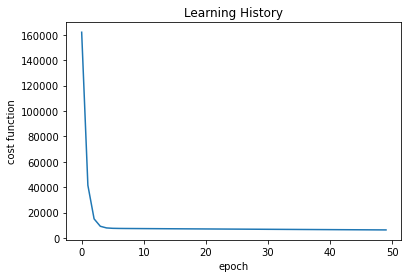

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history)
plt.xlabel('epoch')
plt.ylabel('cost function')
plt.title('Learning History')
plt.show()

Increasing the number of epochs, the perceptron will modify its parameters to optimize the output:

In [18]:
p = perceptron()
epochs = 7000
history = p.train(X, y, epochs)
print('initial cost = ', history[0])
print(f'final cost after {epochs:.0f} epochs = ', history[-1])


initial cost =  161940.47375841023
final cost after 7000 epochs =  1.2475080095100452e-08


The final outputs are equal to the original known targets,

In [19]:
yp = p.predict(X)

df = pd.DataFrame(X, columns=['ºC'])
df['ºF'] = y
df['yp'] = yp

df

,ºC,ºF,yp
0,-40.0,-40.0,-40.000045
1,-30.0,-22.0,-22.000043
2,-10.0,14.0,13.999962
3,-5.0,23.0,22.999963
4,0.0,32.0,31.999964
5,8.0,46.4,46.399966
6,15.0,59.0,58.999968
7,22.0,71.6,71.599969
8,38.0,100.4,100.399973
9,50.0,122.0,121.999976


The trained perceptron has the parameters

In [20]:
print('w = ', p.w)
print('b = ', p.bias)

w =  1.8000002344786092
b =  31.99996418186047


Since $\frac{9}{5} = 1.8$, we conclude that the trained perceptron equation

\begin{equation}
y_p = wx+b = 1.8x + 32 
\end{equation}

shows that the algorithm 'learned' by itself the well known relation between Celcius and Fahrenheit temperatures,

\begin{equation}
ºF = \frac{9}{5} ºC + 32 
\end{equation}

---
## A classification Perceptron with multiple inputs

Now we will return to a simple perceptron including two inputs: $x_1$ and $x_2$, two weights: $w_1$ and $w_0$ and one bias: $b$ and giving one return: z = $w_1 x_1 + w_2 x_2 + b$.

In [21]:
import numpy as np

class perceptronC:
    def __init__(self):
        self.w = np.array([-2., 5.])
        self.bias = 2.
        
    def predict(self,x):
        self.x = x
        return np.dot(self.w,self.x) + self.bias

    
x = np.array([0., 1.])

p = perceptronC()
p.predict(x)

7.0

In order to transform this perceptron into a classifier, we will incorporate an 'activation function'. For example, we may consider a step function,

\begin{equation}
f_A(z) = \begin{cases}
0 \text{ if } z\leq 0 \\
1 \text{ if } z> 0
\end{cases}
\end{equation}

which classifies the outputs into two possibilities: 0 and 1.

In [22]:
class perceptronC:
    def __init__(self):
        self.w = np.array([-2., 5.])
        self.bias = 2.
        
    def predict(self,x):
        self.x = x
        z = np.dot(self.w,self.x) + self.bias
        return self.fA(z)
    
    def fA(self,z):
        '''
        Activation Function
        '''
        if z<=0:
            return 0
        else:
            return 1

        
x = np.array([2., 5.])
p = perceptronC()
p.predict(x)

1

In [23]:
x = np.array([5., 1.])
perceptronC().predict(x)

0

Now we can apply this perceptron to many input data,

In [24]:
data = np.array([[0., 1.],
                [5., 1.],
                [3., 4.],
                [10., 3.5],
                [6., 4.],
                [4., 2.]])

yp = np.zeros(len(data))

p = perceptronC()

for i in range(len(data)):
    yp[i] = p.predict(data[i])

and we can show the results as a table,

In [26]:
df = pd.DataFrame(data, columns=['x1','x2'])
df['yp'] = yp

df

,x1,x2,yp
0,0.0,1.0,1.0
1,5.0,1.0,0.0
2,3.0,4.0,1.0
3,10.0,3.5,0.0
4,6.0,4.0,1.0
5,4.0,2.0,1.0


---

Lets define a perceptron with the following values:

- $w_1 = -2$
- $w_2 = -2$
- $b = 3$

Hence the result of the linear function is $z = -2 x_1 -2 x_2 +3$. In a plane with axes $(x_1,x_2)$ we have the following straight line:


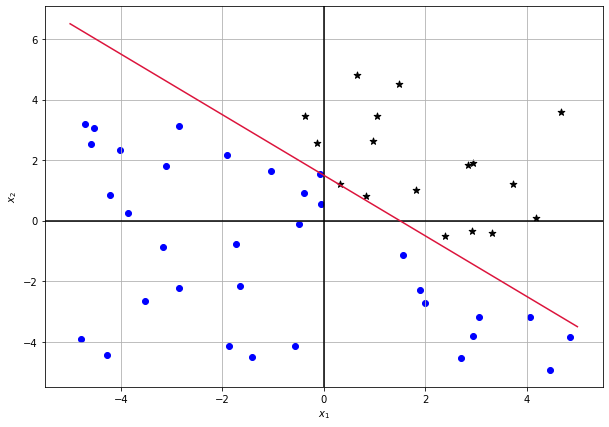

In [27]:
import matplotlib.pyplot as plt

class perceptronC:
    def __init__(self):
        self.w = np.array([-2., -2.])
        self.bias = 3.
        
    def predict(self,x):
        self.x = x
        z = np.dot(self.w,self.x) + self.bias
        return self.fA(z)
    
    def fA(self,z):
        '''
        Activation Function
        '''
        if z<=0:
            return 0
        else:
            return 1


p = perceptronC()

x1 = np.arange(-5,6)
np.random.seed(413)
points = -5 + np.random.rand(50,2)*10

def sl(x1):
    '''
    Straight line equation
    '''
    return -x1 + 3/2 



plt.figure(figsize=(10,7))
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x1, sl(x1), color='crimson')
for i in range(len(points)):
    if points[i,1]>sl(points[i,0]):
        plt.scatter(points[i,0], points[i,1], marker='*', color='black', s=50)
    else:
        plt.scatter(points[i,0], points[i,1], marker='o', color='blue')

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid()
plt.show()

In this plot is easy to show the result of the applying the activation function. Any point above the straight line (black stars) corresponds to a final result of $1$ while any point below the straight line (blue dots) corresponds to a final result of 0 in the binary classifier.

## NAND Logic Gate

Consider a particular case in which the inputs ($x_1$ and $x_2$) are binary values (i.e. $0$ or $1$). The allowed points in the $(x_1,x_2)$ plane are represented as

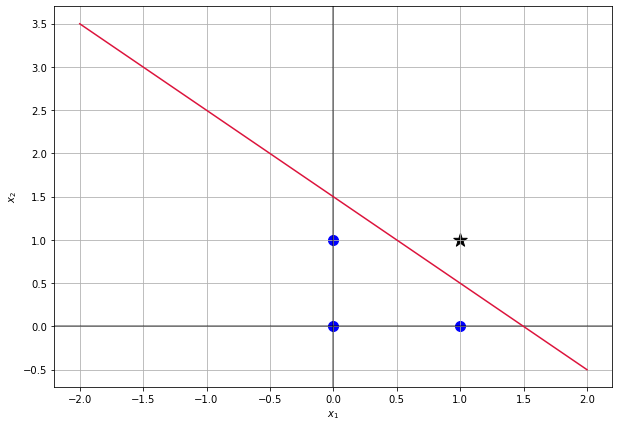

In [28]:
x1 = np.arange(-2,3)


def sl(x1):
    return -x1 + 3/2 

points = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])


plt.figure(figsize=(10,7))
plt.axhline(0, color='black', alpha=0.5)
plt.axvline(0, color='black', alpha=0.5)
plt.plot(x1, sl(x1), color='crimson')
for i in range(len(points)):
    if points[i,1]>sl(points[i,0]):
        plt.scatter(points[i,0], points[i,1], marker='*', color='black', s=200)
    else:
        plt.scatter(points[i,0], points[i,1], marker='o', color='blue', s=100)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid()
plt.show()

This plot shows immediately the results of applying the perceptron to these datapoints,

In [29]:

class perceptronC:
    def __init__(self):
        self.w = np.array([-2., -2.])
        self.bias = 3.
        
    def predict(self,x):
        self.x = x
        z = np.dot(self.w,self.x) + self.bias
        return self.fA(z)
    
    def fA(self,z):
        '''
        Activation Function
        '''
        if z<=0:
            return 0
        else:
            return 1


p = perceptronC()


points = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])

yp = np.zeros(len(points))

for i in range(len(points)):
    yp[i] = p.predict(points[i])
    
df = pd.DataFrame(points, columns=['x1','x2'])
df['yp'] = yp

df    

,x1,x2,yp
0,0,0,1.0
1,0,1,1.0
2,1,0,1.0
3,1,1,0.0


These results shows that this particualr perceptron reproduces the result of a NAND GATE !!

**Since all logical gates can be obtained using only NAND gates, we can use perceptrons to implement a model of any digital circuit!!**

<img src="https://www.electronics-tutorials.ws/wp-content/uploads/2019/09/log80.gif" >


We can define the NAND Gate perceptron in a compact form as 

In [30]:
class NAND:
    def __init__(self):
        self.w = np.array([-2., -2.])
        self.bias = 3.
        
    def predict(self,x):
        self.x = x
        z = np.dot(self.w,self.x) + self.bias
        return self.fA(z)
    
    def fA(self,z):
        '''
        Activation Function
        '''
        if z<=0:
            return 0
        else:
            return 1


p = NAND()


    
points = np.array([[0,0,0],
                  [0,1,0],
                  [1,0,0],
                  [1,1,0]])
    
for i in range(len(points)):
    points[i,2] = p.predict([points[i,0],points[i,1]])
    
df = pd.DataFrame(points, columns=['x1','x2','y'])

df  

,x1,x2,y
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0


Now we can easily implement an OR GATE:

In [31]:
def ORGate(x1,x2):
    p = NAND()
    y1 = p.predict([x1,x1])
    y2 = p.predict([x2,x2])
    z = p.predict([y1,y2])
    return z

points = np.array([[0,0,0],
                  [0,1,0],
                  [1,0,0],
                  [1,1,0]])
    
for i in range(len(points)):
    points[i,2] = ORGate(points[i,0],points[i,1])
    
df = pd.DataFrame(points, columns=['x1','x2','y'])

df  

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1
